# Центральная предельная теорема
## Peer review

# Logistic distribution
Notes:

  $$ f(x;  mu,s) = exp(-x) / (1+exp(-x))^2   .  (PDF) $$ 
  $$ F(x; mu,s) = 1 / 1 + exp(-(x-mu)/s)     .  (CDF) $$

$$ Links
        $$ https://en.wikipedia.org/wiki/Logistic_distribution (Wikipedia) $$
        $$ https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.logistic.html (logistic distribution in Python)$$
        $$ https://en.wikipedia.org/wiki/Central_limit_theorem (Centre limit theorem, next CLT)$$


In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import logistic

%matplotlib inline

# First part

First part describes logistic distribution and the main features of distribution CDF & PDF.

First of all, I should precise that logistic distribution resembles the normal distribution in shape, but has heavier tails (higher kurtosis). This cumulative distribution function is the logistic function, which appears in logistic regression and feedforward neural networks. For more information, you can click links above.

P.S. I'm sorry for english, unfortunately i don't have russian keyboard for instance.

Kind regards,
Nikita
:)

## 1.Datas generation 

In [2]:
mean, var = logistic.stats(moments='mv') # estimation first and second moments of distribution 
lgst_rv = sts.logistic(mean, var) # Generation of sample with 1000 variables
sample = lgst_rv.rvs(1000)

print mean 
print var

0.0
3.289868133696453


## 2.Cumulative distribution function

Comparing theoretical CDF & empirical CDF

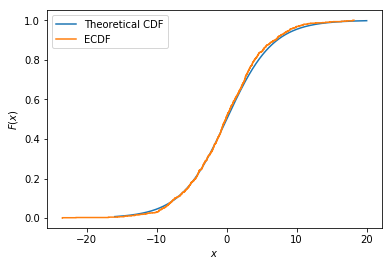

In [3]:
# Theoretical CDF
x = np.linspace(-16,20,1000)
cdf = lgst_rv.cdf(x)
plt.plot(x, cdf, label= 'Theoretical CDF')


#ECDF
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(sample)
plt.step(ecdf.x, ecdf.y, label='ECDF')

plt.ylabel('$F(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

# We can see that the both methods give approximatly the same result

## 3.Probability density function & histogram

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


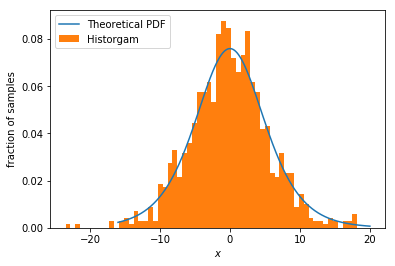

In [4]:
# Construction of theoretical PDF
x = np.linspace(-16,20,1000)
pdf = lgst_rv.pdf(x) # CLT
plt.plot(x, pdf, label= 'Theoretical PDF')

# Construction of histogram, using the main sample with 1000 variables 
plt.hist(sample, bins=60, normed=True, label= 'Historgam')


plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

# We can observe that empirical histogram is enough close to Theoretical PDF.
#However, if we increase number of variable from 1000 to 10000, we will find that the two graphs will be more close

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


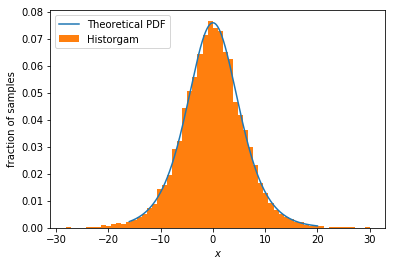

In [5]:
# Check for sample = 10000
sample = lgst_rv.rvs(10000)
# Construction of theoretical PDF
x = np.linspace(-16,20,1000)
pdf = lgst_rv.pdf(x) # CLT
plt.plot(x, pdf, label= 'Theoretical PDF')

# Construction of histogram, using the main sample with 1000 variables 
plt.hist(sample, bins=60, normed=True, label= 'Historgam')


plt.ylabel('fraction of samples')
plt.xlabel('$x$')
plt.legend(loc='upper left')

In [6]:
# Last check for verify accuracy of cdf and ppf. Returns True if two arrays are element-wise equal within a tolerance.
vals = logistic.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], logistic.cdf(vals))

True

# Second part 
    In this part, I created four samples with 1000 parametrs. Parametre contains 5, 50, 500 and 1000 variables. I try to observe how well approximisation is, if number of parametre change. In probability theory, the central limit theorem (CLT) establishes that, in some situations, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed. 
    I attend to obtein a good normalization, then N will be big enougth, due to Law of large numbers.
 
## 1. Data generation & graphics for N=5

In [7]:
lgst = sts.logistic(5)
sample=np.array([lgst.rvs(5) for I in range(1000)]) # sample 1000 for n= 5
mean_arr = np.mean(sample, axis =1) # estimation of sample mean
var_arr = np.var(sample)
st_dev= math.sqrt(var_arr/5)


print mean_arr
print var_arr
print st_dev
print mean_arr.ndim
print mean_arr.shape

[4.83833405 4.83117363 4.43233313 3.28263447 5.20959506 6.73010887
 3.52000858 5.13529456 5.60933832 6.06756679 4.32817529 6.94506241
 5.72233777 4.7637335  4.85072827 5.15272218 4.43873711 6.36057634
 4.75733628 5.09273753 4.67568708 4.80871146 5.70129657 6.06509809
 4.78560348 4.29609154 4.91998083 5.20620438 4.56883769 4.68753064
 1.7644725  6.91146109 4.52248423 5.904014   4.73303263 5.0515341
 5.25429613 4.28839619 5.28310783 5.47790698 6.02595487 4.79983775
 5.45272606 6.11206457 5.71705803 4.78514609 5.89683254 2.71682601
 5.41762397 5.25667773 5.34997458 4.51783056 5.27137563 4.39361649
 4.85857619 4.75120535 5.28728572 5.182889   5.11240048 4.82752344
 6.25981132 3.41952827 6.2709442  5.24363983 5.50141264 6.09442099
 4.60988767 5.56752873 5.1391516  3.67825621 5.25890644 5.28661368
 4.04609484 3.48041557 3.84451449 5.17758266 4.33772733 4.07926566
 5.32078399 4.02025677 5.73491985 4.06960853 5.26256717 5.72447412
 4.9264613  5.26575868 4.27327978 5.50401707 4.85000579 4.88440

In [8]:
mean = np.mean(sample)
var = np.var(sample)
st_dev= math.sqrt(var/1000.)

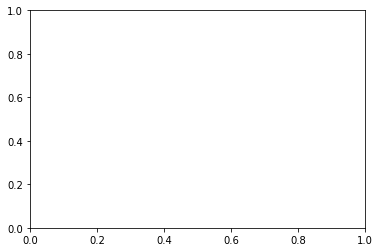

In [9]:
fig, ax = plt.subplots(1, 1) # we determine plot

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


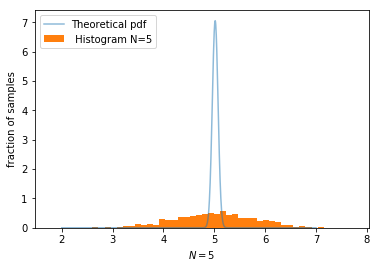

In [24]:
x1 = np.linspace(2, 7, num = 1000)

# Construction of theoretical PDF
norm_rv = sts.norm(mean, st_dev)
pdf = norm_rv.pdf(x1)
plt.plot(x1, pdf, label='Theoretical pdf', alpha=0.5)

# Construction of histogram N = 5
plt.hist(mean_arr, bins = 50, normed = True, label = ' Histogram N=5', histtype='stepfilled')
ax.legend(loc='best', frameon=False)

plt.ylabel('fraction of samples')
plt.xlabel('$N = 5$')
plt.legend(loc='upper left')

# 2. Data generation and graphics for N=50

In [13]:
lgst1 = sts.logistic(50)
sample1=np.array([lgst.rvs(50) for I in range(1000)]) # sample 1000 for n= 50
mean_arr1 = np.mean(sample1, axis =1) # estimation of sample mean

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


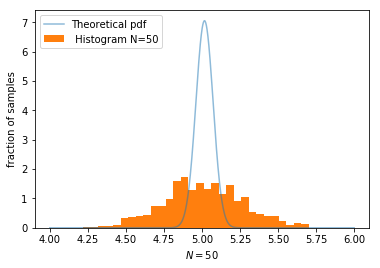

In [23]:
x1 = np.linspace(4, 6, num = 1000)

# Construction of theoretical PDF
norm_rv = sts.norm(mean, st_dev)
pdf = norm_rv.pdf(x1)
plt.plot(x1, pdf, label='Theoretical pdf', alpha=0.5)

# Construction of histogram N = 50
plt.hist(mean_arr1, bins = 30, normed = True, label = ' Histogram N=50', histtype='stepfilled')
ax.legend(loc='best', frameon=False)

plt.ylabel('fraction of samples')
plt.xlabel('$N = 50 $')
plt.legend(loc='upper left')

# 3. Data generation and graphics for N=500

In [15]:
lgst2 = sts.logistic(500)
sample2=np.array([lgst.rvs(500) for I in range(1000)]) # sample 1000 for n= 500
mean_arr2 = np.mean(sample2, axis =1)

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


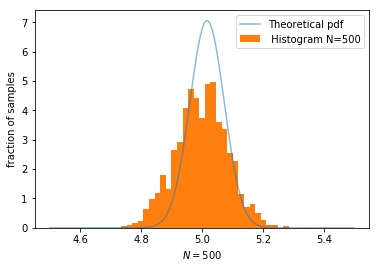

In [25]:
x1 = np.linspace(4.5, 5.5, num = 1000)

# Construction of theoretical PDF
norm_rv = sts.norm(mean, st_dev)
pdf = norm_rv.pdf(x1)
plt.plot(x1, pdf, label='Theoretical pdf', alpha=0.5)

# Construction of histogram N = 500
plt.hist(mean_arr2, bins = 30, normed = True, label = ' Histogram N=500', histtype='stepfilled')
ax.legend(loc='best', frameon=False)

plt.ylabel('fraction of samples')
plt.xlabel('$N = 500$')
plt.legend(loc='upper right')

# 4. Data generation and graphics for N=1000

In [17]:
lgst3 = sts.logistic(1000)
sample3=np.array([lgst.rvs(1000) for I in range(1000)]) # sample 1000 for n= 1000
mean_arr3 = np.mean(sample3, axis =1)

In [18]:
mean = np.mean(sample)
var = np.var(sample)
st_dev= math.sqrt(var/1000.)

C:\Users\BrainService\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


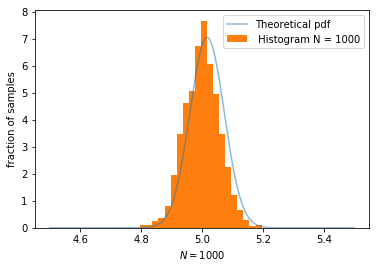

In [27]:
x1 = np.linspace(4.5, 5.5, num = 1000)

# Construction of theoretical PDF
norm_rv = sts.norm(mean, st_dev)
pdf = norm_rv.pdf(x1)
plt.plot(x1, pdf, label='Theoretical pdf', alpha=0.5)

# Construction of histogram N = 1000
plt.hist(mean_arr3, bins = 20, normed = True, label = ' Histogram N = 1000', histtype='stepfilled')
ax.legend(loc='best', frameon=False)

plt.ylabel('fraction of samples')
plt.xlabel('$N = 1000$')
plt.legend(loc='upper right')

# Conclusion.

I empirical verified Central Limit Theorem  and I found confirmation for our basic hypothesis, that the central limit theorem (CLT) establishes that, due to the law of large numbers, when independent random variables are added, their properly normalized sum tends toward a normal distribution (informally a "bell curve") even if the original variables themselves are not normally distributed.

Also we saw how changed aproximisation then N had incrised. In our case, then N increase, aproximisation become better.